### Problem Statement

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
company_data = pd.read_csv('Company_Data (1).csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company_data.skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

In [8]:
company_data.Education = company_data.Education.astype('str')

In [9]:
company_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00


In [10]:
for col in company_data.columns:
    if company_data[col].dtypes == 'object':
        print(f'{col} : {company_data[col].unique()}')

ShelveLoc : ['Bad' 'Good' 'Medium']
Education : ['17' '10' '12' '14' '13' '16' '15' '18' '11']
Urban : ['Yes' 'No']
US : ['Yes' 'No']


In [11]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education       object
Urban           object
US              object
dtype: object

In [12]:
data =pd.get_dummies(company_data,columns=['ShelveLoc','Urban','US','Education'], drop_first=True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,9.50,138,73,11,276,120,42,0,0,1,1,0,0,0,0,0,0,1,0
1,11.22,111,48,16,260,83,65,1,0,1,1,0,0,0,0,0,0,0,0
2,10.06,113,35,10,269,80,59,0,1,1,1,0,1,0,0,0,0,0,0
3,7.40,117,100,4,466,97,55,0,1,1,1,0,0,0,1,0,0,0,0
4,4.15,141,64,3,340,128,38,0,0,1,0,0,0,1,0,0,0,0,0


In [13]:
data.dtypes

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
ShelveLoc_Good        uint8
ShelveLoc_Medium      uint8
Urban_Yes             uint8
US_Yes                uint8
Education_11          uint8
Education_12          uint8
Education_13          uint8
Education_14          uint8
Education_15          uint8
Education_16          uint8
Education_17          uint8
Education_18          uint8
dtype: object

### Visualization

<AxesSubplot:>

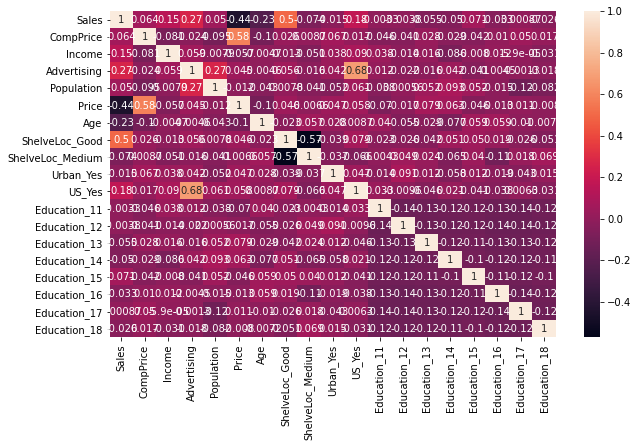

In [14]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True)

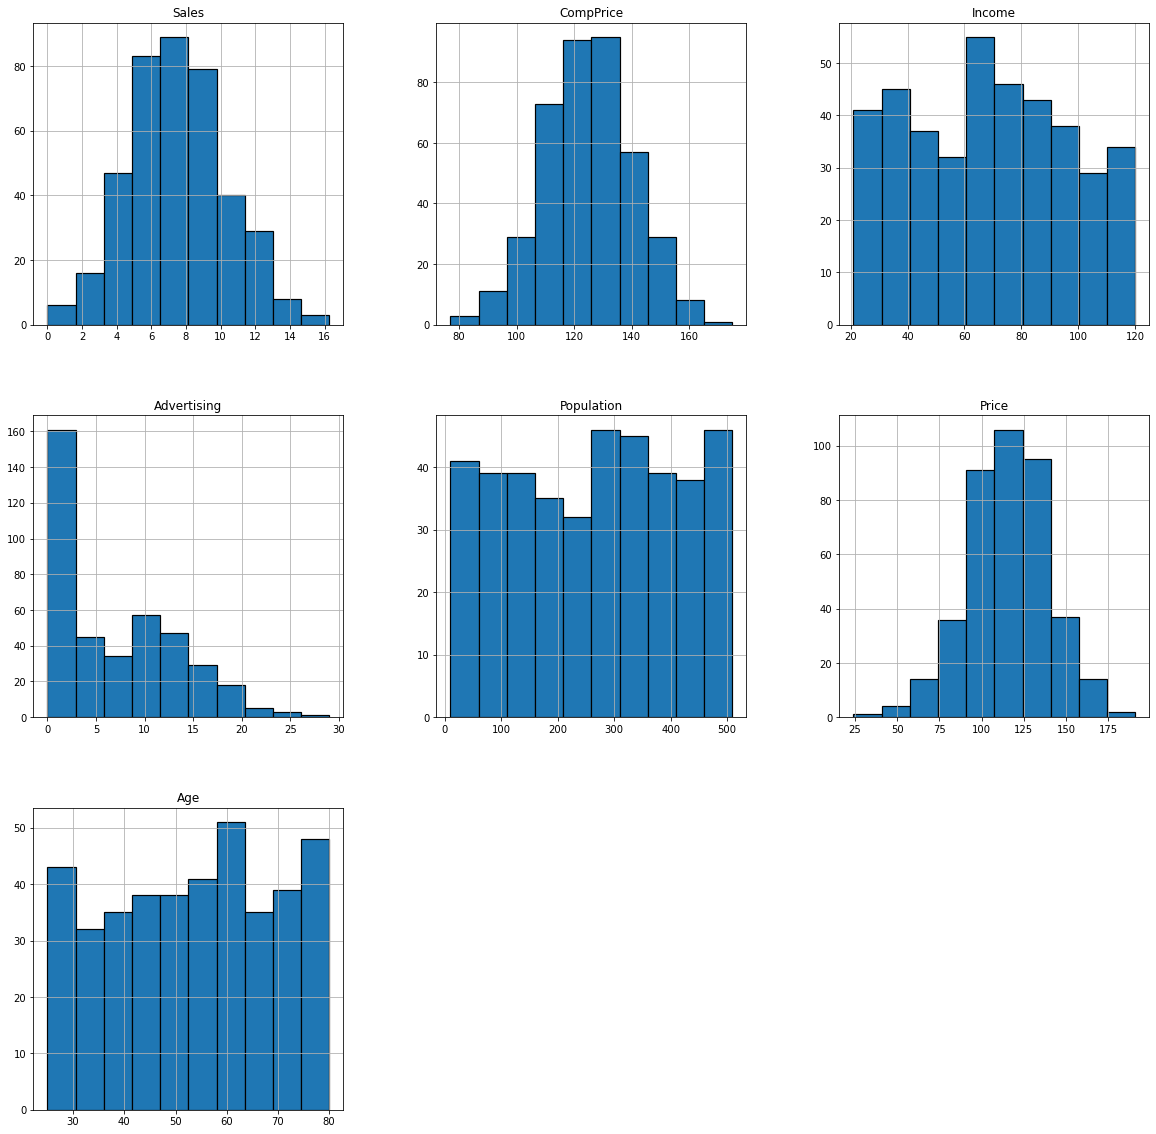

In [15]:
company_data.hist(edgecolor='black', figsize = (20,20), linewidth=1.2)
plt.show()

<AxesSubplot:xlabel='Education', ylabel='Sales'>

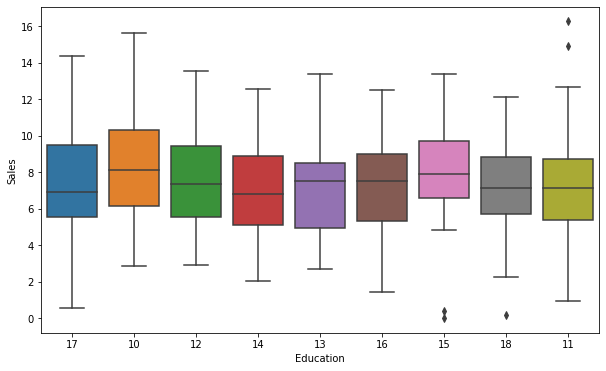

In [16]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Education', y='Sales', hue=None, data=company_data)

<AxesSubplot:xlabel='ShelveLoc', ylabel='Sales'>

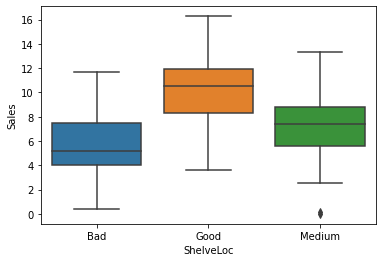

In [17]:
plt.figure(figsize = (6,4))
sns.boxplot(x='ShelveLoc', y='Sales', hue=None, data=company_data)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

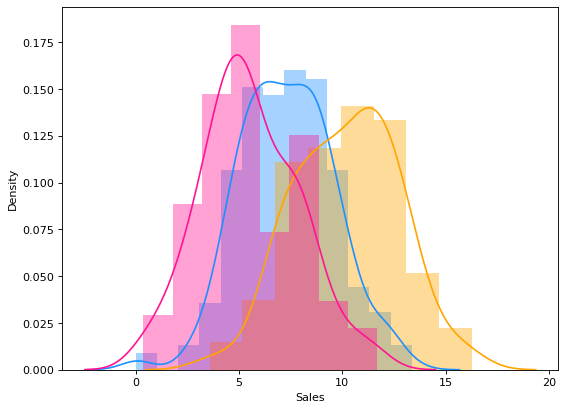

In [18]:
plt.figure(figsize=(8,6), dpi= 80)
sns.distplot(company_data['Sales'].loc[company_data['ShelveLoc'] == 'Medium'], color="dodgerblue", label="Medium")
sns.distplot(company_data['Sales'].loc[company_data['ShelveLoc'] == 'Good'], color="orange", label="Good")
sns.distplot(company_data['Sales'].loc[company_data['ShelveLoc'] == 'Bad'], color="deeppink", label="Bad")

### Feature scalling

In [19]:
#Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [20]:
data_norm = norm_func(data).round(3)
data_norm

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,0.584,0.622,0.525,0.379,0.533,0.575,0.309,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.690,0.347,0.273,0.552,0.501,0.353,0.727,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.618,0.367,0.141,0.345,0.519,0.335,0.618,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.455,0.408,0.798,0.138,0.914,0.437,0.545,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.255,0.653,0.434,0.103,0.661,0.623,0.236,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.773,0.622,0.879,0.586,0.387,0.623,0.145,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
396,0.377,0.633,0.020,0.103,0.054,0.575,0.545,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.455,0.867,0.051,0.414,0.717,0.808,0.273,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,0.365,0.235,0.586,0.241,0.549,0.425,0.455,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X = data_norm.drop('Sales', axis = 1)
y = data_norm.Sales
X.shape, y.shape

((400, 18), (400,))

### train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 18), (80, 18), (320,), (80,))

### Training the model

In [23]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test).round(3)

0.711

In [24]:
print('MSE {} :'.format(mean_squared_error(y_test, y_pred).round(3)))

MSE 0.008 :


### Hyperparameter Tuning

In [29]:
param_grid = [{'n_estimators' : [i for i in range (50, 550, 50)]}]
grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
y_pred1 = grid.predict(X_test)

In [30]:
print('MSE {} :'.format(mean_squared_error(y_test, y_pred1).round(3)))

MSE 0.008 :


In [32]:
grid.best_params_

{'n_estimators': 350}

In [33]:
grid.best_score_

-0.009567438158622444